# Fama French 3-Factor Modeling of NYSE stocks

In [2]:
import pandas as pd

### Extracting and Preparing Data

In [4]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [5]:
import yfinance as yf

**Enter dates range:**

In [7]:
# Define the start and end dates (yyyy-mm-dd)
start_date = pd.to_datetime("2022-01-01")
end_date = pd.to_datetime("2024-11-06")

# Calculate the difference in months
months_diff = (end_date.year - start_date.year) * 12 + end_date.month - start_date.month

print(months_diff)

34


**Enter stock tickers:**

In [9]:
# List of tickers for NSE stocks (append '.NS' to each NSE ticker)
tickers = ["JPM", "CVX", "PLTR", "AMD", "TSLA", "AMZN", "UBER", "GOOG", "MSFT", "DIS"]  # Add more tickers as needed

# Download historical data for 1 or 2 years
data = yf.download(tickers, start=start_date, end=end_date)

# Extract only the closing prices
closing_prices = data['Close']

# Display the combined DataFrame
print(closing_prices.head())

# Optionally, save to a CSV file if you want
closing_prices.to_csv("nse_closing_prices.csv")

[*********************100%***********************]  10 of 10 completed

Ticker                            AMD        AMZN         CVX         DIS  \
Date                                                                        
2022-01-03 00:00:00+00:00  150.240005  170.404495  119.260002  156.759995   
2022-01-04 00:00:00+00:00  144.419998  167.522003  121.430000  155.729996   
2022-01-05 00:00:00+00:00  136.149994  164.356995  122.220001  155.190002   
2022-01-06 00:00:00+00:00  136.229996  163.253998  123.260002  156.899994   
2022-01-07 00:00:00+00:00  132.000000  162.554001  125.029999  157.830002   

Ticker                           GOOG         JPM        MSFT       PLTR  \
Date                                                                       
2022-01-03 00:00:00+00:00  145.074493  161.699997  334.750000  18.530001   
2022-01-04 00:00:00+00:00  144.416504  167.830002  329.010010  18.170000   
2022-01-05 00:00:00+00:00  137.653503  163.779999  316.380005  16.959999   
2022-01-06 00:00:00+00:00  137.550995  165.520004  313.880005  16.740000   
2022

In [10]:
df = pd.read_csv(r"nse_closing_prices.csv")
df.head()

,Date,AMD,AMZN,CVX,DIS,GOOG,JPM,MSFT,PLTR,TSLA,UBER
0,2022-01-03 00:00:00+00:00,150.240005,170.404495,119.260002,156.759995,145.074493,161.699997,334.750000,18.530001,399.926666,43.950001
1,2022-01-04 00:00:00+00:00,144.419998,167.522003,121.430000,155.729996,144.416504,167.830002,329.010010,18.170000,383.196655,44.419998
2,2022-01-05 00:00:00+00:00,136.149994,164.356995,122.220001,155.190002,137.653503,163.779999,316.380005,16.959999,362.706665,43.240002
3,2022-01-06 00:00:00+00:00,136.229996,163.253998,123.260002,156.899994,137.550995,165.520004,313.880005,16.740000,354.899994,42.029999
4,2022-01-07 00:00:00+00:00,132.000000,162.554001,125.029999,157.830002,137.004501,167.160004,314.040009,16.559999,342.320007,41.509998


In [11]:
df.set_index('Date', inplace =True)

In [12]:
df.shape

(715, 10)

#### Calculating daily returns

In [14]:
import numpy as np

In [15]:
returns = df.pct_change()

In [16]:
returns.dropna(inplace = True)

In [17]:
returns.head()

,AMD,AMZN,CVX,DIS,GOOG,JPM,MSFT,PLTR,TSLA,UBER
Date,,,,,,,,,,
2022-01-04 00:00:00+00:00,-0.038738,-0.016916,0.018196,-0.006571,-0.004536,0.037910,-0.017147,-0.019428,-0.041833,0.010694
2022-01-05 00:00:00+00:00,-0.057264,-0.018893,0.006506,-0.003467,-0.046830,-0.024132,-0.038388,-0.066593,-0.053471,-0.026565
2022-01-06 00:00:00+00:00,0.000588,-0.006711,0.008509,0.011019,-0.000745,0.010624,-0.007902,-0.012972,-0.021523,-0.027983
2022-01-07 00:00:00+00:00,-0.031050,-0.004288,0.014360,0.005927,-0.003973,0.009908,0.000510,-0.010753,-0.035447,-0.012372
2022-01-10 00:00:00+00:00,0.000000,-0.006570,0.000640,-0.007793,0.011456,0.000957,0.000732,-0.003623,0.030342,0.026259


### Constructing portfolio

__Equal weighted portfolio__

In [20]:
#weights = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
# Count the total number of stocks
num_stocks = len(df.columns)
num_stocks


# Create an array of equal weights
equal_weights = np.repeat(1/num_stocks, num_stocks)
equal_weights

weights = equal_weights
weights

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [21]:
# Create portfolio returns column
returns['Portfolio']= returns.dot(weights)

In [22]:
returns.head()

,AMD,AMZN,CVX,DIS,GOOG,JPM,MSFT,PLTR,TSLA,UBER,Portfolio
Date,,,,,,,,,,,
2022-01-04 00:00:00+00:00,-0.038738,-0.016916,0.018196,-0.006571,-0.004536,0.037910,-0.017147,-0.019428,-0.041833,0.010694,-0.007837
2022-01-05 00:00:00+00:00,-0.057264,-0.018893,0.006506,-0.003467,-0.046830,-0.024132,-0.038388,-0.066593,-0.053471,-0.026565,-0.032910
2022-01-06 00:00:00+00:00,0.000588,-0.006711,0.008509,0.011019,-0.000745,0.010624,-0.007902,-0.012972,-0.021523,-0.027983,-0.004710
2022-01-07 00:00:00+00:00,-0.031050,-0.004288,0.014360,0.005927,-0.003973,0.009908,0.000510,-0.010753,-0.035447,-0.012372,-0.006718
2022-01-10 00:00:00+00:00,0.000000,-0.006570,0.000640,-0.007793,0.011456,0.000957,0.000732,-0.003623,0.030342,0.026259,0.005240


In [23]:
returns['Portfolio'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Portfolio,714.0,0.000607,0.017998,-0.073726,-0.009293,0.000419,0.011122,0.078218


In [24]:
# Calculate cumulative returns (growth factor)
daily_cum_ret=(1+returns).cumprod()
daily_cum_ret.tail()

,AMD,AMZN,CVX,DIS,GOOG,JPM,MSFT,PLTR,TSLA,UBER,Portfolio
Date,,,,,,,,,,,
2024-10-30 00:00:00+00:00,0.989084,1.131015,1.241405,0.606532,1.214135,1.387817,1.292099,2.357798,0.643993,1.807281,1.368397
2024-10-31 00:00:00+00:00,0.958932,1.093868,1.247862,0.613677,1.190354,1.372418,1.213891,2.242849,0.624740,1.639363,1.326097
2024-11-01 00:00:00+00:00,0.944223,1.161530,1.283498,0.611189,1.190078,1.378726,1.225900,2.262277,0.622564,1.666667,1.340301
2024-11-04 00:00:00+00:00,0.936568,1.148913,1.291045,0.611062,1.176499,1.359184,1.220194,2.234754,0.607211,1.666667,1.329530
2024-11-05 00:00:00+00:00,0.942891,1.170744,1.286349,0.616420,1.181531,1.369759,1.229156,2.759309,0.628715,1.687144,1.373765


Assuming risk free rate to be 5% for the duration

In [26]:
returns['RF'] = 0.05

In [27]:
# Calculate excess portfolio returns
returns['Portfolio_Excess'] = returns['Portfolio'] - returns['RF']

In [28]:
returns.tail()

,AMD,AMZN,CVX,DIS,GOOG,JPM,MSFT,PLTR,TSLA,UBER,Portfolio,RF,Portfolio_Excess
Date,,,,,,,,,,,,,
2024-10-30 00:00:00+00:00,-0.106165,0.009956,-0.003165,-0.010923,0.029216,0.006774,0.001343,-0.027599,-0.007591,0.002777,-0.010538,0.05,-0.060538
2024-10-31 00:00:00+00:00,-0.030485,-0.032844,0.005201,0.011780,-0.019587,-0.011096,-0.060528,-0.048753,-0.029897,-0.092912,-0.030912,0.05,-0.080912
2024-11-01 00:00:00+00:00,-0.015340,0.061856,0.028558,-0.004054,-0.000232,0.004596,0.009893,0.008662,-0.003482,0.016655,0.010711,0.05,-0.039289
2024-11-04 00:00:00+00:00,-0.008107,-0.010862,0.005880,-0.000209,-0.011410,-0.014174,-0.004654,-0.012166,-0.024661,0.000000,-0.008036,0.05,-0.058036
2024-11-05 00:00:00+00:00,0.006751,0.019001,-0.003637,0.008769,0.004277,0.007781,0.007345,0.234726,0.035414,0.012287,0.033271,0.05,-0.016729


In [29]:
import matplotlib.pyplot as plt

### Benchmark data

get S&P500 data for benchmark

In [32]:
sp500_ticker = "^GSPC"

In [33]:
sp500_data = yf.download(sp500_ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [34]:
sp500_closing_prices = sp500_data['Close']

In [35]:
# Display the closing prices for S&P500
print(sp500_closing_prices.tail())

Ticker                           ^GSPC
Date                                  
2024-10-30 00:00:00+00:00  5813.669922
2024-10-31 00:00:00+00:00  5705.450195
2024-11-01 00:00:00+00:00  5728.799805
2024-11-04 00:00:00+00:00  5712.689941
2024-11-05 00:00:00+00:00  5782.759766


In [36]:
# Calculate daily returns
sp500_returns = sp500_closing_prices.pct_change().dropna()

In [37]:
# Display Nifty 50 returns
print(sp500_returns.tail())

Ticker                        ^GSPC
Date                               
2024-10-30 00:00:00+00:00 -0.003300
2024-10-31 00:00:00+00:00 -0.018615
2024-11-01 00:00:00+00:00  0.004093
2024-11-04 00:00:00+00:00 -0.002812
2024-11-05 00:00:00+00:00  0.012266


In [38]:
# Calculate cumulative returns (growth factor)
sp500_cum_ret=(1+sp500_returns).cumprod()
sp500_cum_ret.tail()

Ticker,^GSPC
Date,
2024-10-30 00:00:00+00:00,1.212050
2024-10-31 00:00:00+00:00,1.189488
2024-11-01 00:00:00+00:00,1.194356
2024-11-04 00:00:00+00:00,1.190997
2024-11-05 00:00:00+00:00,1.205606


In [39]:
sp500_returns['RF'] = 0.05

In [40]:
sp500_returns['Market_Excess'] = sp500_returns['^GSPC'] - sp500_returns['RF']

In [41]:
sp500_returns.tail()

Ticker,^GSPC,RF,Market_Excess
Date,,,
2024-10-30 00:00:00+00:00,-0.003300,0.05,-0.053300
2024-10-31 00:00:00+00:00,-0.018615,0.05,-0.068615
2024-11-01 00:00:00+00:00,0.004093,0.05,-0.045907
2024-11-04 00:00:00+00:00,-0.002812,0.05,-0.052812
2024-11-05 00:00:00+00:00,0.012266,0.05,-0.037734


### Combining the required dataframes:

In [43]:
FamaFrenchData = pd.DataFrame()

In [44]:
returns.shape

(714, 13)

In [45]:
sp500_returns.shape

(714, 3)

In [46]:
Market_Excess = sp500_returns['Market_Excess'].reset_index()

In [47]:
Market_Excess.head()

,Date,Market_Excess
0,2022-01-04 00:00:00+00:00,-0.050630
1,2022-01-05 00:00:00+00:00,-0.069393
2,2022-01-06 00:00:00+00:00,-0.050964
3,2022-01-07 00:00:00+00:00,-0.054050
4,2022-01-10 00:00:00+00:00,-0.051441


In [48]:
Portfolio_Excess = returns["Portfolio_Excess"].reset_index()

In [49]:
Portfolio_Excess.head()

,Date,Portfolio_Excess
0,2022-01-04 00:00:00+00:00,-0.057837
1,2022-01-05 00:00:00+00:00,-0.082910
2,2022-01-06 00:00:00+00:00,-0.054710
3,2022-01-07 00:00:00+00:00,-0.056718
4,2022-01-10 00:00:00+00:00,-0.044760


In [50]:
# Convert 'Date' column in both dataframes to datetime64 (make sure they're both in the same format)
Portfolio_Excess['Date'] = pd.to_datetime(Portfolio_Excess['Date'], errors='coerce')  # Coerce invalid formats to NaT
Market_Excess['Date'] = pd.to_datetime(Market_Excess['Date'], errors='coerce')  # Same here

# Now merge on 'Date' (after converting to datetime)
FamaFrenchData = pd.merge(Portfolio_Excess, Market_Excess, on='Date', how='inner')

In [51]:
nat_count = FamaFrenchData['Date'].isna().sum()

In [52]:
nat_count

0

In [53]:
FamaFrenchData.set_index('Date', inplace = True)

**Fama French Data:**

In [55]:
FamaFrenchData.tail()

,Portfolio_Excess,Market_Excess
Date,,
2024-10-30 00:00:00+00:00,-0.060538,-0.053300
2024-10-31 00:00:00+00:00,-0.080912,-0.068615
2024-11-01 00:00:00+00:00,-0.039289,-0.045907
2024-11-04 00:00:00+00:00,-0.058036,-0.052812
2024-11-05 00:00:00+00:00,-0.016729,-0.037734


### Calculating Beta

**with Covariance and variance of benchmark**

In [58]:
# Calculate the co-variance matrix between Portfolio_Excess and Market_Excess
covariance_matrix = FamaFrenchData[['Portfolio_Excess', 'Market_Excess']].cov()

In [59]:
covariance_matrix

,Portfolio_Excess,Market_Excess
Portfolio_Excess,0.000324,0.000179
Market_Excess,0.000179,0.000124


In [60]:
# Extract the co-variance co-efficient
covariance_coefficient = covariance_matrix.iloc[0, 1]
print(covariance_coefficient)

0.00017850929377744525


In [61]:
# Calculate the benchmark variance
benchmark_variance = FamaFrenchData['Market_Excess'].var()
print(benchmark_variance)

0.00012416761304298387


In [62]:
# Calculating the portfolio market beta
portfolio_beta = covariance_coefficient/benchmark_variance
print(portfolio_beta)

1.4376477843352726


#### Calculating beta with CAPM

<img src="screenshots/capm.JPG" alt="Image Description" width="50%">

In [65]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf 

# Define the regression formula
CAPM_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess', data=FamaFrenchData)

# Print adjusted r-squared of the fitted regression
CAPM_fit = CAPM_model.fit()
print(CAPM_fit.rsquared_adj)

# Extract the beta
regression_beta = CAPM_fit.params['Market_Excess']
print(regression_beta)

0.7919854577210157
1.4376477843352697


### Alpha and multi-factor models

##### The Fama French 3-factor model

#### Data Preparation

In [69]:
# Require SMB and HML
small = "VB"
big = "^DJI"
value = "IWD"
growth = "IWF"

In [70]:
# Download data
def download_data(symbol, start_date, end_date):
    data2 = yf.download(symbol, start=start_date, end=end_date)
    # Convert index to datetime
    data2.index = pd.to_datetime(data2.index)
    return data2['Adj Close']
    

# Fetch adjusted close prices for each
small_data = download_data(small, start_date, end_date)
big_data = download_data(big, start_date, end_date)
value_data = download_data(value, start_date, end_date)
growth_data = download_data(growth, start_date, end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [71]:
# changing column names for convenience
small_data.columns = ['small']
big_data.columns = ['big']
value_data.columns = ['value']
growth_data.columns = ['growth']

In [72]:
small_data.index.dtype

datetime64[ns, UTC]

In [73]:
big_data.head()

,big
Date,
2022-01-03 00:00:00+00:00,36585.058594
2022-01-04 00:00:00+00:00,36799.648438
2022-01-05 00:00:00+00:00,36407.109375
2022-01-06 00:00:00+00:00,36236.468750
2022-01-07 00:00:00+00:00,36231.660156


In [74]:
# Calculate daily returns
small_returns = small_data.pct_change().dropna()
big_returns = big_data.pct_change().dropna()
value_returns = value_data.pct_change().dropna()
growth_returns = growth_data.pct_change().dropna()

In [75]:
combined_returns = pd.concat([small_returns, big_returns, value_returns, growth_returns], axis = 1) # axis = 1 to join along columns 
combined_returns.head()

,small,big,value,growth
Date,,,,
2022-01-04 00:00:00+00:00,0.002242,0.005866,0.008782,-0.010365
2022-01-05 00:00:00+00:00,-0.028074,-0.010667,-0.008765,-0.031912
2022-01-06 00:00:00+00:00,0.004829,-0.004687,0.001958,-0.002781
2022-01-07 00:00:00+00:00,-0.007681,-0.000133,0.002488,-0.011019
2022-01-10 00:00:00+00:00,-0.003802,-0.004493,-0.001536,-0.000584


In [76]:
combined_returns['SMB'] = combined_returns['small'] - combined_returns['big'] 
combined_returns['HML'] = combined_returns['value'] - combined_returns['growth'] 

In [77]:
combined_returns.head()

,small,big,value,growth,SMB,HML
Date,,,,,,
2022-01-04 00:00:00+00:00,0.002242,0.005866,0.008782,-0.010365,-0.003623,0.019147
2022-01-05 00:00:00+00:00,-0.028074,-0.010667,-0.008765,-0.031912,-0.017407,0.023147
2022-01-06 00:00:00+00:00,0.004829,-0.004687,0.001958,-0.002781,0.009516,0.004739
2022-01-07 00:00:00+00:00,-0.007681,-0.000133,0.002488,-0.011019,-0.007548,0.013506
2022-01-10 00:00:00+00:00,-0.003802,-0.004493,-0.001536,-0.000584,0.000691,-0.000952


In [78]:
ff = combined_returns[['SMB', 'HML']]
ff.to_csv("fama_factors.csv")

In [79]:
ff.head()

,SMB,HML
Date,,
2022-01-04 00:00:00+00:00,-0.003623,0.019147
2022-01-05 00:00:00+00:00,-0.017407,0.023147
2022-01-06 00:00:00+00:00,0.009516,0.004739
2022-01-07 00:00:00+00:00,-0.007548,0.013506
2022-01-10 00:00:00+00:00,0.000691,-0.000952


##### Fama French Data Final:

In [81]:
FamaFrenchData_final = pd.merge(FamaFrenchData, ff, on='Date', how='inner')

In [82]:
FamaFrenchData_final.tail()

,Portfolio_Excess,Market_Excess,SMB,HML
Date,,,,
2024-10-30 00:00:00+00:00,-0.060538,-0.053300,0.002543,0.003310
2024-10-31 00:00:00+00:00,-0.080912,-0.068615,-0.005334,0.021311
2024-11-01 00:00:00+00:00,-0.039289,-0.045907,-0.004367,-0.007248
2024-11-04 00:00:00+00:00,-0.058036,-0.052812,0.008792,0.002226
2024-11-05 00:00:00+00:00,-0.016729,-0.037734,0.006537,-0.003208


### MODEL VALIDATION 1: Checking Multicollinearity OF features or independent variables w/ Correlation matrix

In [84]:
FamaFrenchData_final.corr()

,Portfolio_Excess,Market_Excess,SMB,HML
Portfolio_Excess,1.000000,0.890100,0.556204,-0.648375
Market_Excess,0.890100,1.000000,0.474747,-0.555809
SMB,0.556204,0.474747,1.000000,-0.190215
HML,-0.648375,-0.555809,-0.190215,1.000000


**No Multicollinearity: It WON'T be difficult for the model to find which feature is actually contributing to predict the target** <br/>
Features in the model are not highly correlated with each other, ensuring that each feature independently contributes to predicting the target variable **without REDUNDANCY**.

### MODEL VALIDATION 2: Checking Llinearity w/ Scatter plots

Text(0.5, 1.0, 'SMB vs Portfolio_Excess')

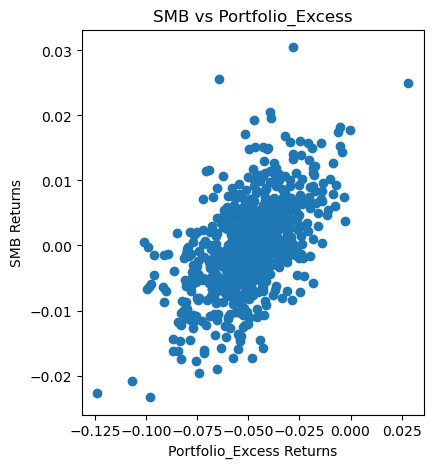

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

# Portfolio vs Treasury
plt.subplot(1, 3, 3)
plt.scatter(FamaFrenchData_final['Portfolio_Excess'], FamaFrenchData_final['SMB'])
plt.xlabel("Portfolio_Excess Returns")
plt.ylabel("SMB Returns")
plt.title("SMB vs Portfolio_Excess")

Text(0.5, 1.0, 'HML vs Portfolio_Excess')

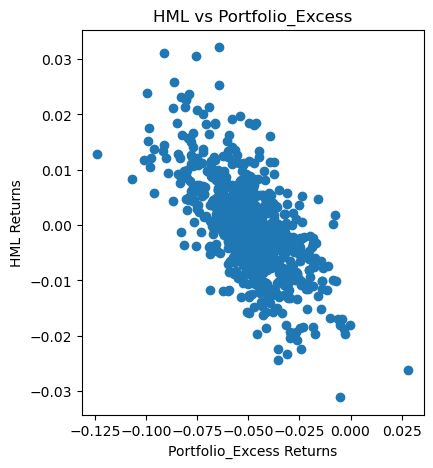

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

# Portfolio vs Treasury
plt.subplot(1, 3, 3)
plt.scatter(FamaFrenchData_final['Portfolio_Excess'], FamaFrenchData_final['HML'])
plt.xlabel("Portfolio_Excess Returns")
plt.ylabel("HML Returns")
plt.title("HML vs Portfolio_Excess")

Text(0.5, 1.0, 'Market_Excess vs Portfolio_Excess')

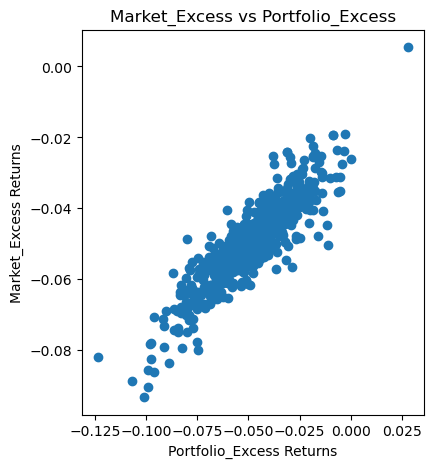

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

# Portfolio vs Treasury
plt.subplot(1, 3, 3)
plt.scatter(FamaFrenchData_final['Portfolio_Excess'], FamaFrenchData_final['Market_Excess'])
plt.xlabel("Portfolio_Excess Returns")
plt.ylabel("Market_Excess Returns")
plt.title("Market_Excess vs Portfolio_Excess")

**All the plots have a linear plot: This means that a change in the independent variables (Market_Excess, HML, SMB) results in a proportional change in the dependent variable**

### **The Fama French 3-factor model**

In [92]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf 

# Define the regression formula
FamaFrench_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML', data=FamaFrenchData_final)

# Fit the regression
FamaFrench_fit = FamaFrench_model.fit()

# Extract the adjusted r-squared
regression_adj_rsq = FamaFrench_fit.rsquared_adj
print(regression_adj_rsq)

0.8551768756153967


In [93]:
# Extract the p-value of the SMB factor
smb_pval = FamaFrench_fit.pvalues['SMB']

# If the p-value is significant, print significant
if smb_pval < 0.05:
    significant_msg = 'significant'
else:
    significant_msg = 'not significant'

# Print the SMB coefficient
smb_coeff = FamaFrench_fit.params['SMB']
print("The SMB coefficient is ", smb_coeff, " and is ", significant_msg)

The SMB coefficient is  0.4867636199045067  and is  significant


Historically, since 1982, value stocks have outperformed growth stocks in the majority of cases, and the tide often shifts during times of crisis and during bubbles such as the dot-com bubble during the late 1990's and early 2000's.

In [95]:
# Calculate your portfolio alpha
portfolio_alpha = FamaFrench_fit.params['Intercept']
print(portfolio_alpha)

# Annualize your portfolio alpha
portfolio_alpha_annualized = ((1+portfolio_alpha)**(12/months_diff))-1
print(portfolio_alpha_annualized)

0.0036654220162840668
0.0012921473017779572


### MODEL PERFORMANCE: Checking R squared and other metrics in OLS Regression Summary

In [97]:
print(FamaFrench_fit.summary())

                            OLS Regression Results                            
Dep. Variable:       Portfolio_Excess   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1404.
Date:                Sun, 19 Jan 2025   Prob (F-statistic):          5.52e-298
Time:                        11:02:21   Log-Likelihood:                 2547.2
No. Observations:                 714   AIC:                            -5086.
Df Residuals:                     710   BIC:                            -5068.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0037      0.002      2.341

**The model explains 87% of the variance in the portfolio's excess returns, indicating a strong fit between the independent variables (Market_Excess, SMB, and HML) and the dependent variable.**

### Extract residuals / errors

In [100]:
# Extract residuals
residuals = FamaFrench_fit.resid

# Display residuals
residuals.head()

Date
2022-01-04 00:00:00+00:00    0.003861
2022-01-05 00:00:00+00:00    0.007538
2022-01-06 00:00:00+00:00   -0.006169
2022-01-07 00:00:00+00:00    0.007761
2022-01-10 00:00:00+00:00    0.005775
dtype: float64

In [101]:
# Convert residuals to a DataFrame
residuals_df = pd.DataFrame({'Residuals': FamaFrench_fit.resid})

residuals_df.head()

,Residuals
Date,
2022-01-04 00:00:00+00:00,0.003861
2022-01-05 00:00:00+00:00,0.007538
2022-01-06 00:00:00+00:00,-0.006169
2022-01-07 00:00:00+00:00,0.007761
2022-01-10 00:00:00+00:00,0.005775


### MODEL VALIDATION 3: Checking Idependence of of residuals w/ Autocorrelation Function (ACF) and D-W test

#### Autocorrelation Function (ACF) 

In [104]:
from statsmodels.graphics.tsaplots import plot_acf

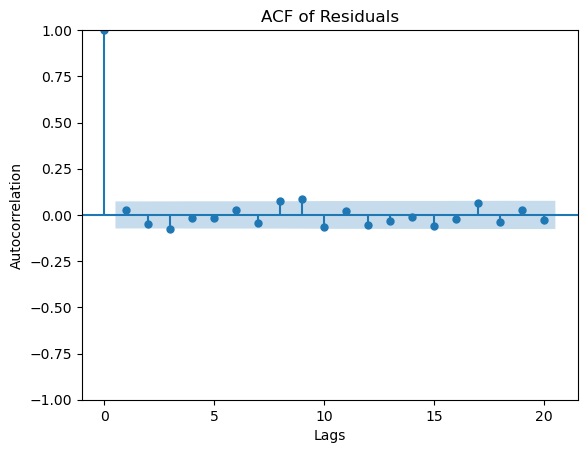

In [105]:
plot_acf(FamaFrench_fit.resid, lags=20)

plt.title('ACF of Residuals')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

By default, alpha=0.05 (for 95% confidence level)

**In this analysis, most autocorrelations fall within the intervals, suggesting no significant autocorrelation in the residuals.**

**This means the model has NOT missed something importatnt and capturing most of the information**

#### Durbin Watson test

In [110]:
from statsmodels.stats.stattools import durbin_watson

# Perform the Durbin-Watson test
dw_stat = durbin_watson(FamaFrench_fit.resid)

# Display the result
print(f"Durbin-Watson statistic: {dw_stat}")

Durbin-Watson statistic: 1.942803089276677


Durbin-Watson statistic range: The value ranges from 0 to 4.
- **~2**: **No autocorrelation.**
- **<2**: Positive autocorrelation.
- **>2**: Negative autocorrelation.

**The Durbin-Watson test statistic is [DW value], which is close to 2, indicating no significant autocorrelation in the residuals**

### MODEL VALIDATION 4: Checking Normality of residuals with histogram 

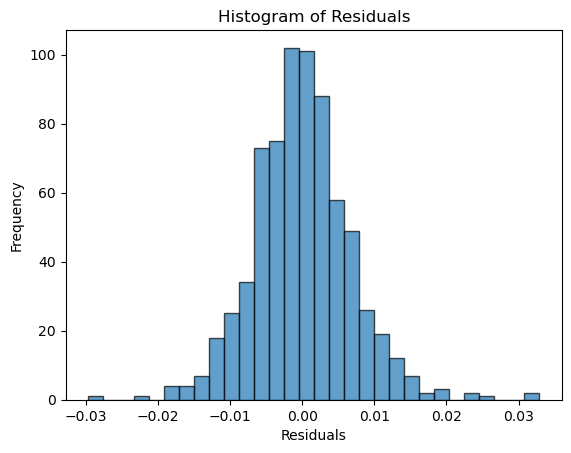

In [114]:
import matplotlib.pyplot as plt

# Plot histogram of residuals
plt.hist(FamaFrench_fit.resid, bins=30, edgecolor='k', alpha=0.7)

plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [115]:
from scipy.stats import skew, kurtosis
# Calculate skewness and kurtosis of residuals
residual_skewness = skew(residuals)
residual_kurtosis = kurtosis(residuals)

In [116]:
print(f'Residual Skewness: {residual_skewness}')
print(f'Residual Kurtosis: {residual_kurtosis}')

Residual Skewness: 0.3571078315868412
Residual Kurtosis: 2.1481488167769234


- The residuals are roughly symmetrical, with only a slight right skew.
- The distribution of residuals is flatter than normal, meaning the model might not have as many outliers as a normal distribution would expect.

**Both skewness and kurtosis values are within a reasonable range, suggesting that the residuals do not exhibit extreme departures from normality, which is good for model assumptions.**

Ideal value: Skew (0) and Kurtosis (3) Reasonable range: Skew (-1 to 1) and Kurtosis (2 to 4)

**The histogram of the residuals suggests that they follow a distribution similar to normal, indicating that the assumption of normality is reasonably met.**

#### Shapiro-Wilk Test:

In [122]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test
stat, p_value = shapiro(FamaFrench_fit.resid)

# Display the result
print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}")

Shapiro-Wilk Test Statistic: 0.9785720109939575, p-value: 1.01289296949858e-08


**The Shapiro-Wilk test for normality returned a p-value of 0.0012. Since the p-value is less than 0.05, we reject the null hypothesis, suggesting that the residuals are not normally distributed.**

Apply **transformations** (e.g., logarithmic, Box-Cox) to make the residuals more normal, preserving the linear framework of your model. <br/>
Explore PCA, Consider **robust regression methods** for more reliable coefficient estimation

### MODEL VALIDATION 5: Checking Homoscedasticity of Residuals

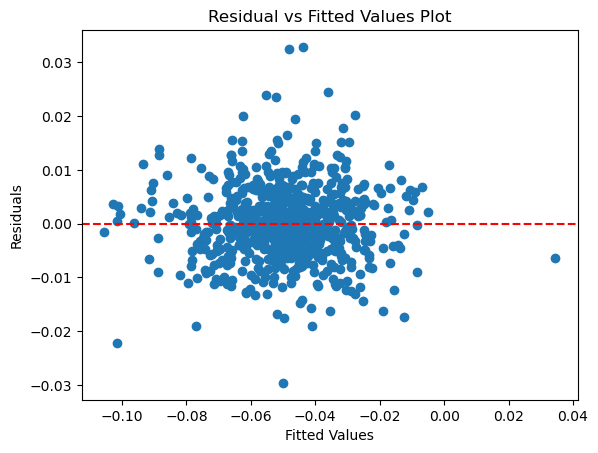

In [126]:
residuals = FamaFrench_fit.resid
fitted_values = FamaFrench_fit.fittedvalues

plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted Values Plot")
plt.show()

**The residual plot shows a random scatter around the zero line without any discernible pattern, indicating that the variance of the residuals is constant. This suggests that the model satisfies the assumption of homoscedasticity**

**Most of the Model assumptions are met**